### modules import

In [63]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


### 데이터셋 로드
- MNIST 데이터셋을 로드
- Train Data 중, 30% 를 검증 데이터(validation data)로 사용

In [64]:
tf.random.set_seed(0)
(x_train_full, y_train_full),(x_test,y_test) = load_data(path='mnist.npz')

# training set 을 30% 비율로 나눠 validation set 생성
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=0)

### 데이터 확인

In [65]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

print("학습 데이터 : {}\t 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t 레이블: {}".format(x_test.shape, y_test.shape))


학습 데이터 : (60000, 28, 28)	 레이블: (60000,)
학습 데이터 : (42000, 28, 28)	 레이블: (42000,)
검증 데이터 : (18000, 28, 28)	 레이블: (18000,)
테스트 데이터 : (10000, 28, 28)	 레이블: (10000,)


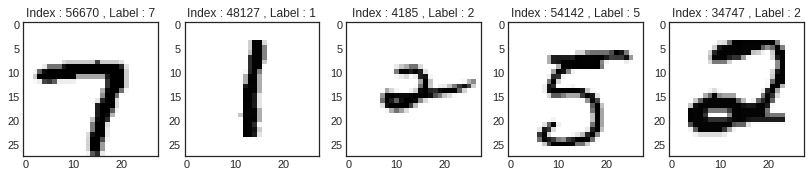

In [66]:
num_sample = 5
random_idxs = np.random.randint(60000,size=num_sample)
plt.figure(figsize=(14,8))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label= y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(img)
  plt.title('Index : {} , Label : {}'.format(idx, label))

In [67]:
# 현재 정답
y_train[0]

5

## 데이터 전처리
- Normalization

In [68]:
# 0~255 사이로 색을 구분하여 0, 1 사이의 값으로 Normalization
x_train = x_train/255.
x_val = x_val /255.
x_test = x_test/255.

In [69]:
# label 화
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## 모델 구성(Sequential)

In [70]:
model = Sequential([Input(shape=(28,28), name='input'),
                  Flatten(input_shape=[28,28], name='flatten'),
                  Dense(100, activation='relu', name='Dense1'),
                  Dense(64, activation='relu', name='Dense2'),
                  Dense(32, activation='relu', name='Dense3'),
                  Dense(10, activation='softmax')])
# softmax로 10개 에 대한 확률값을 추정

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
Dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
Dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


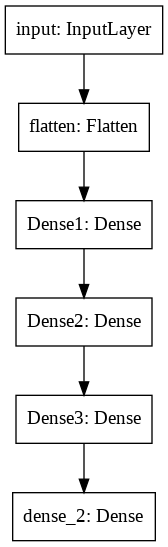

In [72]:
plot_model(model)

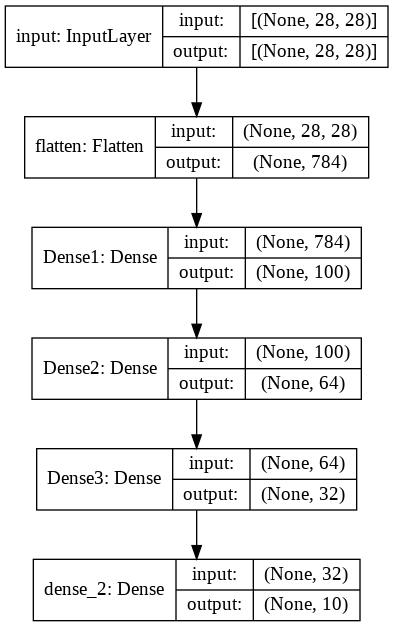

In [73]:
plot_model(model, show_shapes=True)

## 모델 컴파일

In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## 모델 학습
- 모델 시각화를 위해 history 라는 변수에 학습 과정을 담음

In [75]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=28,
                    validation_data=(x_val, y_val))

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4370 - accuracy: 0.5528 - val_loss: 0.3682 - val_accuracy: 0.8963
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3419 - accuracy: 0.9041 - val_loss: 0.2767 - val_accuracy: 0.9203
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9238 - val_loss: 0.2414 - val_accuracy: 0.9303
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2144 - accuracy: 0.9373 - val_loss: 0.2059 - val_accuracy: 0.9401
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1832 - accuracy: 0.9477 - val_loss: 0.1835 - val_accuracy: 0.9462
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1635 - accuracy: 0.9544 - val_loss: 0.1680 - val_accuracy: 0.9505
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1442 - accuracy: 0.9586 - val_loss: 0.1523 - val_accuracy:

## 학습 결과 시각화

In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

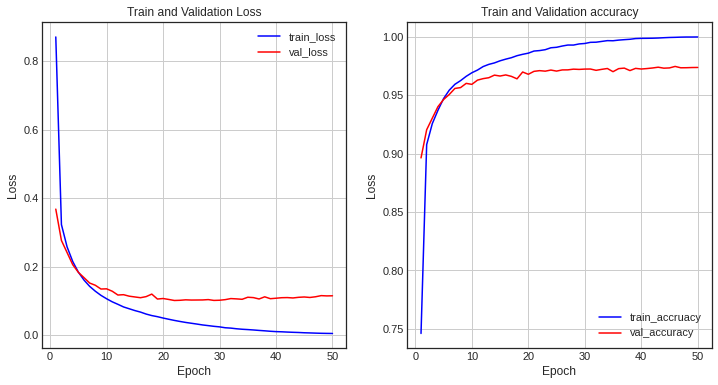

In [77]:
history_dict = history.history
loss= history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accruacy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가(1)
- evaluate()

In [78]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9733


[0.10964072495698929, 0.9732999801635742]

## 학습된 모델을 통해 값 예측

In [79]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
# 각 클래스에 속하는 확률 값
print(pred_ys[0])

(10000, 10)
[1.1957577e-09 6.7406788e-11 7.9319022e-09 3.3853624e-07 2.0428725e-11
 5.4933008e-10 1.0901860e-16 9.9999928e-01 1.1651475e-09 2.9871816e-07]


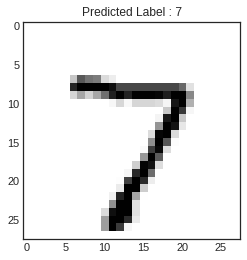

In [80]:
arg_pred_y = np.argmax(pred_ys, axis=1)
plt.imshow(x_test[0])
plt.title('Predicted Label : {}'.format(arg_pred_y[0]))
plt.show()

## 모델 평가(2)
- 혼동행렬 (Confusion Matrix)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

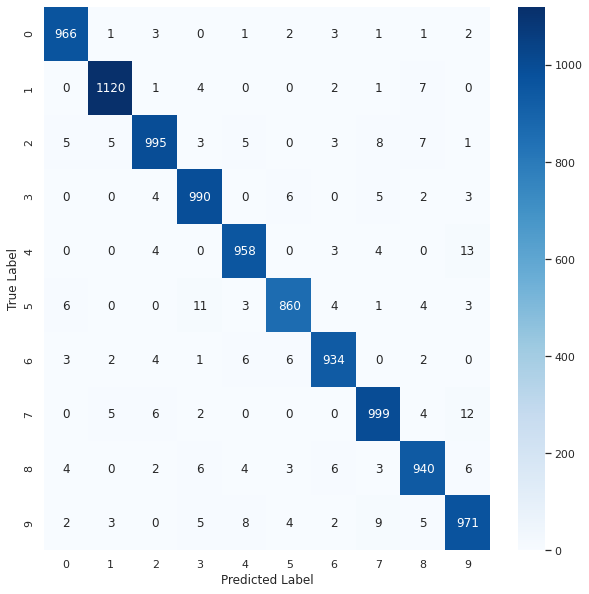

In [82]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 모델 평가(3)
- 분류 보고서

In [83]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [84]:
model.save('mnist_model.h5')

In [85]:
loaded_model=models.load_model('mnist_model.h5')

In [86]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
Dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
Dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [88]:
# 제대로 불러왔는지 확인하기
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)

np.set_printoptions(precision=7)
# 각 클래스에 속하는 확률 값
print(pred_ys2[0])

(10000, 10)
[1.1957577e-09 6.7406788e-11 7.9319022e-09 3.3853624e-07 2.0428725e-11
 5.4933008e-10 1.0901860e-16 9.9999928e-01 1.1651475e-09 2.9871816e-07]


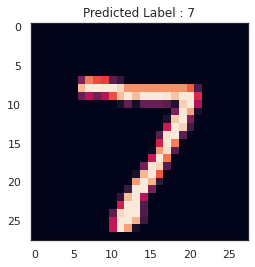

In [89]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)
plt.imshow(x_test[0])
plt.title('Predicted Label : {}'.format(arg_pred_y2[0]))
plt.show()